<a href="https://colab.research.google.com/github/Shyam-Vishnu/Neural-Networks-CNN-RNN-and-LSTM/blob/master/Day_X_retention_time_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dx Retention Multiversus


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path ="/content/drive/MyDrive/est.csv"
path = "/content/drive/MyDrive/dax x retention with golden cohort.csv"
df= 0
df = pd.read_csv(path)
df.head()

,Cohort date,Days since launch,Golden cohort,Tier 1 character,Tier 2 character,1,2,3,4,5,...,170,171,172,173,174,175,176,177,178,179
0,4/22/2019,0,1,0,0,0.75,0.65,0.56,0.54,0.51,...,0.10,0.10,0.10,0.10,0.08,0.07,0.07,0.07,0.07,0.08
1,4/23/2019,1,1,0,0,0.62,0.49,0.46,0.42,0.32,...,0.05,0.06,0.06,0.05,0.04,0.04,0.04,0.04,0.05,0.05
2,4/24/2019,2,0,0,0,0.57,0.48,0.42,0.32,0.29,...,0.05,0.05,0.04,0.03,0.03,0.03,0.03,0.04,0.04,0.03
3,4/25/2019,3,0,0,0,0.60,0.48,0.34,0.30,0.30,...,0.05,0.04,0.03,0.03,0.03,0.03,0.04,0.04,0.03,0.03
4,4/26/2019,4,0,0,0,0.58,0.35,0.30,0.28,0.25,...,0.03,0.02,0.02,0.02,0.03,0.04,0.03,0.02,0.02,0.02


In [4]:
# Renaming Cohort date as ds
df.rename({'Cohort date': 'ds'}, axis=1, inplace=True)

In [5]:
#Using mk 11 to superimpose and get adequate values of multiversus

# Calculate chane for that period

In [6]:
# Packages
!pip install pystan~=2.14
!pip install fbprophet
import pandas as pd
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 77 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638246 sha256=b95eb98c25c144a5e25c9f1510c4b9e93676323e08870c93611ecf5b04832aad
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the p

In [7]:
import pandas as pd
from fbprophet import Prophet

In [8]:
day_no_retention = ['1',	'2',	'3',	'4',	'5',	'6',	'7',	'8',	'9',	'10',	'11',	'12',	'13',	'14',	'15',	'16',	'17',	'18',	'19',	'20',	'21',	'22',	'23',	'24',	'25',	'26',	'27',	'28',	'29',	'30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',	'42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',	'54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',	'66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',	'78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',	'90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',	'102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',	'114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',	'126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',	'138',	'139',	'140',	'141',	'142',	'143',	'144',	'145',	'146',	'147',	'148',	'149',	'150',	'151',	'152',	'153',	'154',	'155',	'156',	'157',	'158',	'159',	'160',	'161',	'162',	'163',	'164',	'165',	'166',	'167',	'168',	'169',	'170',	'171',	'172',	'173',	'174',	'175',	'176',	'177',	'178',	'179']


In [9]:
# Add other regressors as well
df_day= {}
for day in day_no_retention:
  
  df_day[day] = pd.DataFrame(data=df, 
                         columns=["ds",day,"Golden cohort","Tier 1 character","Tier 2 character"])
  

  #,"Golden cohort","Tier 1 character","Tier 2 character"



In [10]:
df_day['1']

,ds,1,Golden cohort,Tier 1 character,Tier 2 character
0,4/22/2019,0.75,1,0,0
1,4/23/2019,0.62,1,0,0
2,4/24/2019,0.57,0,0,0
3,4/25/2019,0.60,0,0,0
4,4/26/2019,0.58,0,0,0
...,...,...,...,...,...
723,4/14/2021,0.46,0,0,0
724,4/15/2021,0.48,0,0,0
725,4/16/2021,0.46,0,0,0
726,4/17/2021,0.39,0,0,0


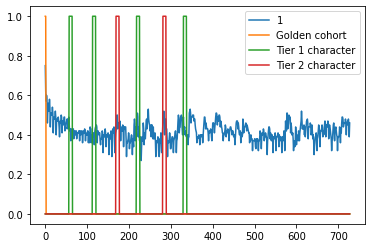

In [11]:

df_day['1'].plot()

In [12]:
# replace with day no retention
for i in day_no_retention:
  df_day[i].rename({i: 'y'}, axis=1, inplace=True)
  #print(df_day[i])

In [13]:
df_test = df_day['1'].iloc[:500,:]

In [14]:
df_test

,ds,y,Golden cohort,Tier 1 character,Tier 2 character
0,4/22/2019,0.75,1,0,0
1,4/23/2019,0.62,1,0,0
2,4/24/2019,0.57,0,0,0
3,4/25/2019,0.60,0,0,0
4,4/26/2019,0.58,0,0,0
...,...,...,...,...,...
495,8/29/2020,0.32,0,0,0
496,8/30/2020,0.37,0,0,0
497,8/31/2020,0.37,0,0,0
498,9/1/2020,0.37,0,0,0


In [17]:
gc = pd.Series([	1,	1,	0,0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0, 0])


In [18]:
t1c = pd.Series([	0,	0, 0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	])

In [19]:
t2c = pd.Series([	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,0	])

In [22]:
# test case
m = Prophet(interval_width= 0.95, daily_seasonality= True)
m.add_country_holidays(country_name='US')
m.add_regressor('Golden cohort')
m.add_regressor('Tier 1 character')
m.add_regressor('Tier 2 character')
model = m.fit(df_test)

# Make fututre dataframe based on values
future = m.make_future_dataframe(periods = 229, freq= 'D')

future['Golden cohort'] = gc
future['Tier 1 character'] = t1c
future['Tier 2 character'] = t2c
#future
forecast = m.predict(future)   

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [23]:
model.train_holiday_names.to_list()

["New Year's Day",
 'Martin Luther King Jr. Day',
 "Washington's Birthday",
 'Memorial Day',
 'Independence Day',
 'Labor Day',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving',
 'Christmas Day',
 'Independence Day (Observed)']

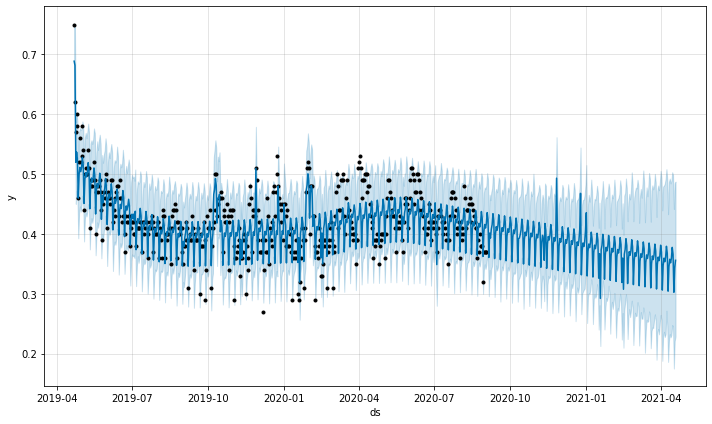

In [24]:
plot1 = m.plot(forecast)

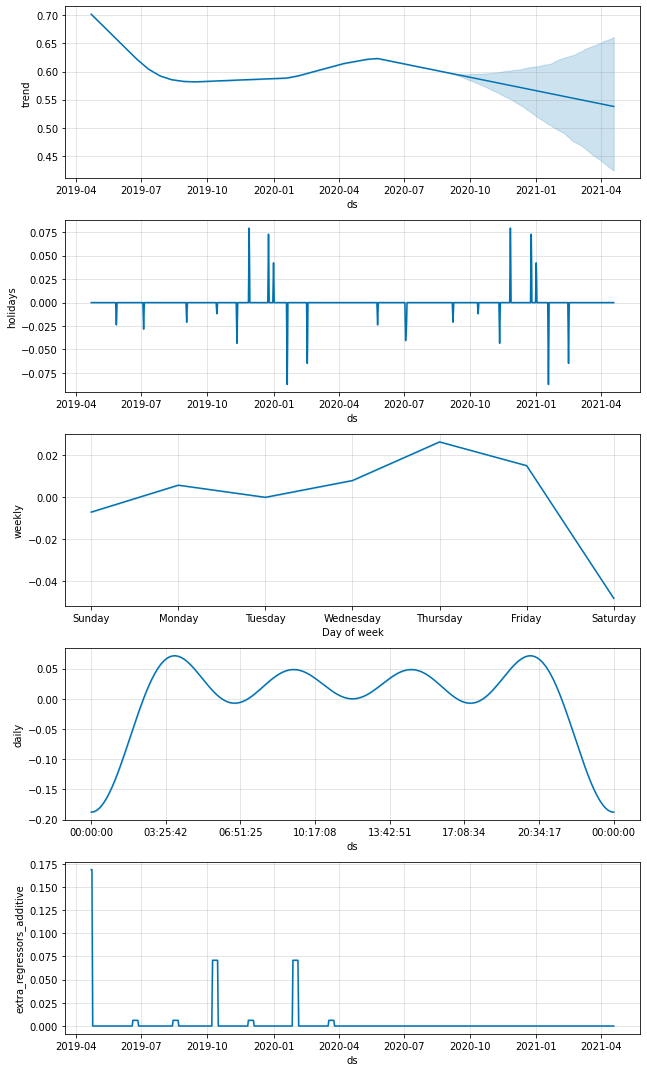

In [25]:
plot2 = m.plot_components(forecast)

In [27]:
# https://github.com/facebook/prophet/issues/1829
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '100 days',period =  '25 days', horizon = '229 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2019-08-20 00:00:00 and 2020-01-17 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-08-21,0.407635,0.371756,0.442300,0.44,2019-08-20
1,2019-08-22,0.430171,0.391378,0.467804,0.45,2019-08-20
2,2019-08-23,0.420467,0.382307,0.457997,0.44,2019-08-20
3,2019-08-24,0.354510,0.318798,0.391258,0.36,2019-08-20
4,2019-08-25,0.396190,0.361935,0.431005,0.42,2019-08-20


In [28]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,23 days,0.001530,0.039120,0.032112,0.082627,0.072291,0.722321
1,24 days,0.001424,0.037730,0.031245,0.080902,0.072291,0.733929
2,25 days,0.001413,0.037587,0.031199,0.080161,0.072291,0.727679
3,26 days,0.001525,0.039056,0.032076,0.081647,0.074117,0.718750
4,27 days,0.001685,0.041051,0.033433,0.085346,0.074123,0.701786


In [119]:
ddf = forecast[['ds','yhat']]
# Download
# Comma seperated
from google.colab import files
ddf.to_csv('forecasted_df.csv')
files.download('forecasted_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
future

,ds,Golden cohort,Tier 1 character,Tier 2 character
0,2019-04-22,1.0,0.0,0.0
1,2019-04-23,1.0,0.0,0.0
2,2019-04-24,0.0,0.0,0.0
3,2019-04-25,0.0,0.0,0.0
4,2019-04-26,0.0,0.0,0.0
...,...,...,...,...
952,2021-11-29,NaN,NaN,NaN
953,2021-11-30,NaN,NaN,NaN
954,2021-12-01,NaN,NaN,NaN
955,2021-12-02,NaN,NaN,NaN


In [31]:
new_df = pd.DataFrame()
for i in day_no_retention:
  m = Prophet(interval_width= 0.95, daily_seasonality= True)
  m.add_country_holidays(country_name='US')
  m.add_regressor('Golden cohort')
  m.add_regressor('Tier 1 character')
  m.add_regressor('Tier 2 character')
  model = m.fit(df_day[i].iloc[:500,:])


  # Make fututre dataframe based on values
  future = m.make_future_dataframe(periods = 229, freq= 'D')

  future['Golden cohort'] = gc
  future['Tier 1 character'] = t1c
  future['Tier 2 character'] = t2c
  #future
  forecast = m.predict(future) 






  #future = m.make_future_dataframe(periods = 20, freq= 'D')
  #forecast = m.predict(future)
  #print(forecast.tail())
  #plot1 = m.plot(forecast)
  #plot2 = m.plot_components(forecast)
  #print(forecast[['ds','yhat']])
  new_df[i]= forecast['yhat']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

In [32]:
# combined forecasts
new_df

,1,2,3,4,5,6,7,8,9,10,...,170,171,172,173,174,175,176,177,178,179
0,0.688798,0.568596,0.505205,0.482708,0.426159,0.374757,0.372519,0.357360,0.340422,0.339251,...,0.074477,0.078709,0.080394,0.076637,0.060515,0.054764,0.055308,0.054986,0.058821,0.065602
1,0.681749,0.568605,0.514111,0.477196,0.403964,0.367723,0.369695,0.352611,0.341668,0.349106,...,0.075373,0.080023,0.079535,0.073237,0.059851,0.055128,0.054401,0.055659,0.060912,0.064810
2,0.519708,0.399408,0.339920,0.285548,0.256908,0.235702,0.227487,0.212011,0.209669,0.194078,...,0.024865,0.024571,0.021455,0.019245,0.020847,0.020435,0.020282,0.022456,0.022564,0.018562
3,0.536847,0.400377,0.316606,0.274816,0.251686,0.231505,0.233941,0.228507,0.208814,0.174966,...,0.025233,0.021071,0.019869,0.018618,0.019534,0.021533,0.023194,0.021916,0.019438,0.017352
4,0.524268,0.343679,0.281409,0.251439,0.230320,0.222954,0.245103,0.221534,0.176446,0.158039,...,0.018760,0.018180,0.017929,0.016558,0.019465,0.022577,0.021603,0.016082,0.016002,0.014731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0.377493,0.272864,0.199308,0.152772,0.140775,0.123549,0.119560,0.116918,0.100352,0.073712,...,0.025604,0.022012,0.022426,0.025485,0.026459,0.025024,0.025778,0.022559,0.021386,0.020006
725,0.365918,0.217028,0.164960,0.130198,0.120240,0.115798,0.131599,0.110706,0.068668,0.057378,...,0.019195,0.019181,0.020556,0.023444,0.026418,0.026099,0.024196,0.016717,0.017972,0.017392
726,0.302459,0.204477,0.164965,0.128327,0.126703,0.141126,0.127164,0.077429,0.058375,0.052930,...,0.017798,0.018041,0.019614,0.023932,0.028459,0.025567,0.018650,0.014452,0.017110,0.017018
727,0.343270,0.245786,0.197117,0.161021,0.165247,0.146679,0.110733,0.087756,0.075814,0.068063,...,0.020457,0.021157,0.023504,0.028081,0.029487,0.022351,0.020311,0.017950,0.019230,0.021187


In [33]:
# Download
# Comma seperated
from google.colab import files
new_df.to_csv('forecasted_new_df.csv')
files.download('forecasted_new_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Reduce the dataset that you are forecasting to test and train
# 500

In [ ]:
# Daily active users  = New users + retention users. (day 1 retention * previous day + day 2 retention * day before yesterday)
# ARPDAU per user predicted
# DAU * ARPDAU (predicted?) = Daily revenue
# Sum(DAU * ARPDAU) = Live revenue            

In [ ]:
# Download
# Comma seperated
from google.colab import files
df.to_csv('test.csv')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>